In [6]:
import pandas as pd
np=pd.np
from sdd_api.api import Api
from credentials import *
import matplotlib.pyplot as plt
%matplotlib inline
api = Api(username=username, password=password, client_id=client_id, client_secret=client_secret)

To get the data, enter in the table name from our metadata sheet. 

In [8]:
dfs=api.get_dataframe('dfs_salaries')
dfs.sample(4)

,season,week_num,player_name,team_name,position,opp_name,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary,player_id
5345,2017,13,Jaydon Mickens,JAC,WR,IND,0.0,4500.0,0.0,3000.0,0.0,10.0,
5499,2017,13,DeVante Parker,MIA,WR,DEN,1.0,6100.0,1.5,4500.0,1.0,13.0,17007
2565,2017,6,Robby Anderson,NYJ,WR,NE,9.6,5600.0,11.6,4400.0,9.6,13.0,479
746,2017,2,Rex Burkhead,NE,RB,NO,11.9,5000.0,13.4,3900.0,11.9,13.0,2996


In [9]:
dfs.describe()

,season,week_num,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary
count,7723.0,7723.000000,6996.000000,7679.000000,6453.000000,7115.000000,6464.000000,6412.000000
mean,2017.0,9.131944,6.171204,5322.802448,7.048015,3936.556571,6.052064,14.956956
std,0.0,4.926796,6.927541,1139.731972,7.955757,1456.716996,7.040357,7.093512
min,2017.0,1.000000,-4.000000,0.000000,-4.000000,0.000000,-4.000000,10.000000
25%,2017.0,5.000000,0.300000,4500.000000,0.000000,3000.000000,0.000000,10.000000
50%,2017.0,9.000000,4.000000,4800.000000,4.400000,3400.000000,3.600000,11.000000
75%,2017.0,13.000000,9.845000,5900.000000,11.000000,4700.000000,9.600000,18.000000
max,2017.0,17.000000,44.800000,9800.000000,55.600000,10000.000000,44.800000,41.000000


In [10]:
dfs.groupby(["position"]).agg([max])

,season,week_num,player_name,team_name,opp_name,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary,player_id
,max,max,max,max,max,max,max,max,max,max,max,max
position,,,,,,,,,,,,
DST,2017,17,Washington Redskins,WAS,WAS,33.00,5900.0,32.00,4500.0,32.00,22.0,
K,2017,17,Zane Gonzalez,WAS,WAS,27.00,5400.0,NaN,NaN,NaN,NaN,9338
QB,2017,17,Tyrod Taylor,WAS,WAS,37.64,9600.0,40.64,8300.0,37.64,41.0,9979
RB,2017,17,Zach Zenner,WAS,WAS,44.60,9800.0,55.60,10000.0,44.60,41.0,9817
TE,2017,17,Zach Miller,WAS,WAS,26.20,8500.0,33.10,7400.0,26.20,32.0,9824
WR,2017,17,Zay Jones,WAS,WAS,44.80,9600.0,53.80,9800.0,44.80,41.0,9977


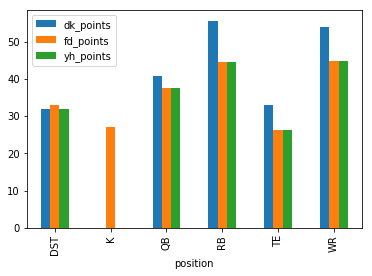

In [11]:
dfs.groupby("position")[['position','dk_points','fd_points','yh_points']].agg(max).plot(kind="bar")

Defaultly, we give you results from 2016-present. To get more data, include a season_start parameter

In [12]:
dfs2014_present=api.get_dataframe('dfs_salaries',season_start=2014)
dfs2014_present.sample(10)

,season,week_num,player_name,team_name,position,opp_name,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary,player_id
593,2016,2,Brock Osweiler,HOU,QB,KC,12.42,7200.0,12.42,6100.0,12.42,27,16829
2818,2015,7,Marques Colston,NO,WR,IND,2.50,5100.0,3.00,3400.0,None,None,4331
6796,2014,16,Alex Smith,KC,QB,PIT,13.84,7400.0,16.84,5600.0,None,None,20414
4796,2016,12,Paul Perkins,NYG,RB,CLE,5.30,4500.0,6.30,3900.0,5.3,14,17305
491,2015,2,Oakland Raiders,OAK,DST,BAL,3.00,4200.0,3.00,2400.0,None,None,
434,2014,1,Andrew Hawkins,CLE,WR,PIT,12.70,5200.0,16.70,4500.0,None,None,9354
6793,2015,17,Kamar Aiken,BAL,WR,CIN,10.10,6500.0,12.60,5400.0,None,None,149
2849,2014,7,Andre Roberts,WAS,WR,TEN,2.80,5000.0,3.80,4100.0,None,None,18694
4728,2017,11,Jay Cutler,MIA,QB,-,4.42,6600.0,4.42,5400.0,4.42,31,4971
5666,2017,13,Brice Butler,DAL,WR,WAS,0.00,4700.0,0.00,3100.0,0,10,3128


### Advanced Features
We also have a few more features

In [13]:
#progress bar
dfs2014_present=api.get_dataframe('dfs_salaries',season_start=2011, progress_bar=True)
dfs2014_present.sample(10)

loading season: 2017: 100%|██████████| 7/7 [00:03<00:00,  1.70it/s]


,season,week_num,player_name,team_name,position,opp_name,fd_points,fd_salary,dk_points,dk_salary,yh_points,yh_salary,player_id
177,2013,1,Philip Rivers,LAC,QB,HOU,24.6,6900.0,None,None,None,None,18658
1912,2013,5,Brian Quick,STL,WR,JAC,5.5,4500.0,None,None,None,None,17996
6199,2017,14,Mason Crosby,GB,K,CLE,3.0,4800.0,NaN,NaN,NaN,NaN,4803
4037,2012,10,Anthony McCoy,SEA,TE,NYJ,0.0,4600.0,None,None,None,None,14516
7171,2013,17,Vernon Davis,SF,TE,ARI,12.0,6400.0,None,None,None,None,5301
5119,2014,12,Matt Forte,CHI,RB,TB,25.7,9300.0,28.2,9500,None,None,7137
3863,2015,10,Darren Sproles,PHI,RB,MIA,5.9,5500.0,8.4,3600,None,None,20938
5384,2016,13,Terrance Williams,DAL,WR,MIN,2.3,4800.0,3.3,3200,2.3,10,24151
4385,2016,11,Theo Riddick,DET,RB,JAC,12.3,6700.0,16.3,5100,12.3,22,18567
5014,2013,13,Oakland Raiders,OAK,DST,DAL,9.0,5000.0,None,None,None,None,


In [15]:
#season_end
player_game_logs=api.get_dataframe("player_game_logs", season_start=2000, season_stop=2002, progress_bar=True)

loading season: 2002: 100%|██████████| 3/3 [00:18<00:00,  6.04s/it]


In [17]:
player_game_logs.sample(3)

,all_purpose_yds,all_td,def_int,def_int_long,def_int_td,def_int_yds,fga,fgm,fumbles,fumbles_forced,...,team_name,two_pt_md,uniform_number,xpa,xpm,yds_from_scrimmage,season,draft_kings_points,player_id,started_game
17061,None,0.0,2.0,None,0.0,17.0,NaN,NaN,None,None,...,PHI,None,None,NaN,NaN,None,2002,0.0,21551,True
9333,None,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,...,IND,None,None,NaN,NaN,None,2002,0.0,20584,True
13763,None,0.0,NaN,None,NaN,NaN,NaN,NaN,None,None,...,NO,None,None,NaN,NaN,None,2001,1.5,4355,True


That's it for this guide! Check out some of our other examples like our daily fantasy lineup optimizer or our power rankings example.